In [1]:
import numpy as np 

height =[60,62,65,68,70,74]
weight = [140,138, 150, 166,190,250]

np.corrcoef(height, weight)[0][1]

0.9298974521408027

In [2]:
import pandas as pd 

df = pd.read_csv('insurance.csv')
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.charges.corr(df.bmi)

0.19834096883362892

In [5]:
from scipy import stats 
r,p = stats.pearsonr(df.charges, df.age)
print(round(r,4))
print(round(p,29))

0.299
5.0000000000000004e-29


In [6]:
corr_df = pd.DataFrame(columns=['r','p'])

for col in df:
    if pd.api.types.is_numeric_dtype(df[col]) and col != 'charges':
        r,p = stats.pearsonr(df.charges, df[col])
        corr_df.loc[col] = [round(r,3),round(p,4)]
        
corr_df

,r,p
age,0.299,0.0000
bmi,0.198,0.0000
children,0.068,0.0129


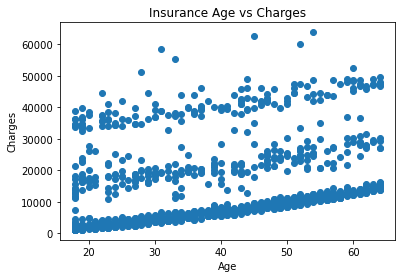

In [7]:
 # Scatter Plot of the data frame using matplotlib
import matplotlib.pyplot as plt
    
plt.scatter(df.age ,df.charges)
plt.title('Insurance Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

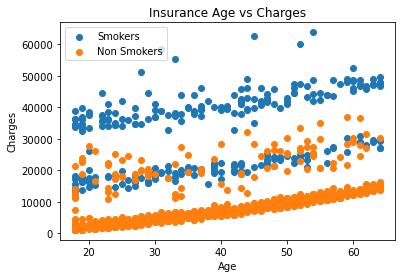

In [8]:
# Lets Try to find the reason for this plot
# We can use other features also

df_smoker = df[df['smoker'] == 'yes']
df_nonsmoker = df[df['smoker']== 'no']

plt.scatter(df_smoker.age ,df_smoker.charges,label='Smokers')
plt.scatter(df_nonsmoker.age ,df_nonsmoker.charges,label='Non Smokers')
plt.title('Insurance Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

#So the smokers have a more insurrance charges

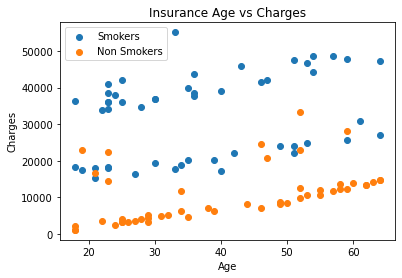

In [9]:
# using less data for better understanding

df_smoker_reduced = df_smoker.sample(50)
df_nonsmoker_reduced = df_nonsmoker.sample(50)

plt.scatter(df_smoker_reduced.age ,df_smoker_reduced.charges,label='Smokers')
plt.scatter(df_nonsmoker_reduced.age ,df_nonsmoker_reduced.charges,label='Non Smokers')
plt.title('Insurance Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

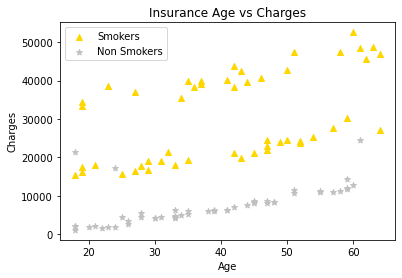

In [10]:
# using less data for better understanding
# beautifying the chart

df_smoker_reduced = df_smoker.sample(50)
df_nonsmoker_reduced = df_nonsmoker.sample(50)

plt.scatter(df_smoker_reduced.age ,df_smoker_reduced.charges,label='Smokers',color='gold',marker='^')
plt.scatter(df_nonsmoker_reduced.age ,df_nonsmoker_reduced.charges,label='Non Smokers',color='silver',marker='*')
plt.title('Insurance Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

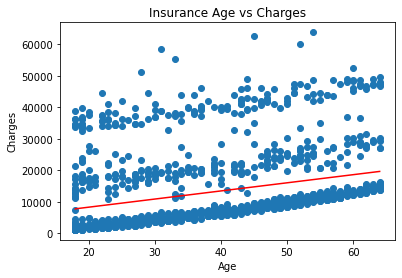

In [11]:
# slope = m , intercept b, r value , p value , err

# slope of a line y= mx + b
# y = slop(x) + intercept

m , b , r, p , err  =stats. linregress(df.age,df.charges)
x= range(18,df.age.max() + 1)
y = m * x + b 
plt.plot(x,y, color = 'red')

# Adding regression line on the plot(data)
plt.scatter(df.age ,df.charges)
plt.title('Insurance Age vs Charges')



plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

In [12]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols

model = ols(formula = 'charges~age', data = df).fit()

white_test = het_white(model.resid, model.model.exog)
breuschpagan_test = het_breuschpagan(model.resid, model.model.exog)

output_df = pd.DataFrame(columns = ['LM stat', 'LM p','F stat', 'F stat p'])
output_df.loc['White'] = white_test
output_df.loc['Breusch-Pagan'] = breuschpagan_test

output_df

,LM stat,LM p,F stat,F stat p
White,0.002713,0.998645,0.001353,0.998648
Breusch-Pagan,0.000413,0.983776,0.000413,0.983792


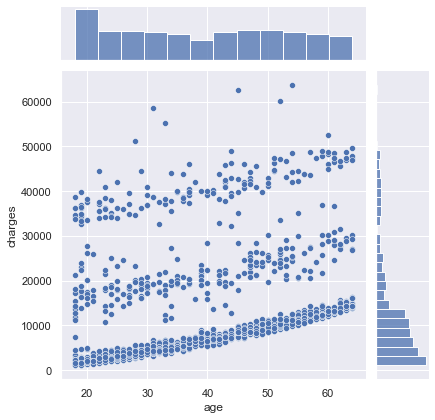

In [13]:
import seaborn as sns

sns.set(color_codes=True)
sns.jointplot(x="age",y='charges',data=df)
plt.show()

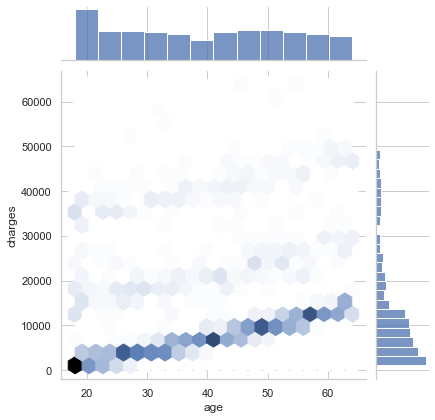

In [14]:
sns.set_style("whitegrid")
sns.jointplot(x="age",y='charges',data=df,kind='hex');

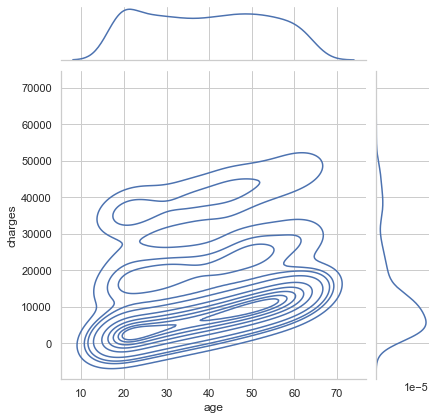

In [15]:
sns.jointplot(x="age",y='charges',data=df,kind='kde');

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


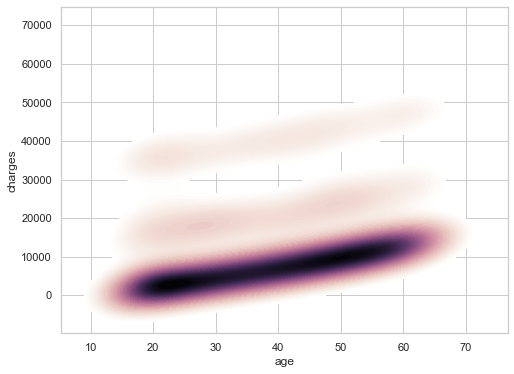

In [16]:
f, ax = plt.subplots(figsize = (8,6))
cmap = sns.cubehelix_palette(as_cmap = True, dark = 0, light= 1 , reverse = False)
sns.kdeplot(df.age,df.charges,cmap = cmap , n_levels = 60 , shade = True);

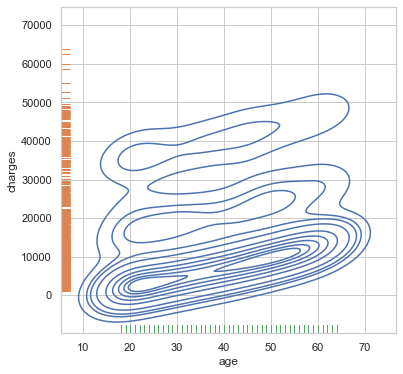

In [17]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(x='age', y='charges', data=df, ax=ax)
sns.rugplot(x='age', data=df, color="g", ax=ax)
sns.rugplot(y='charges', data=df, ax=ax);

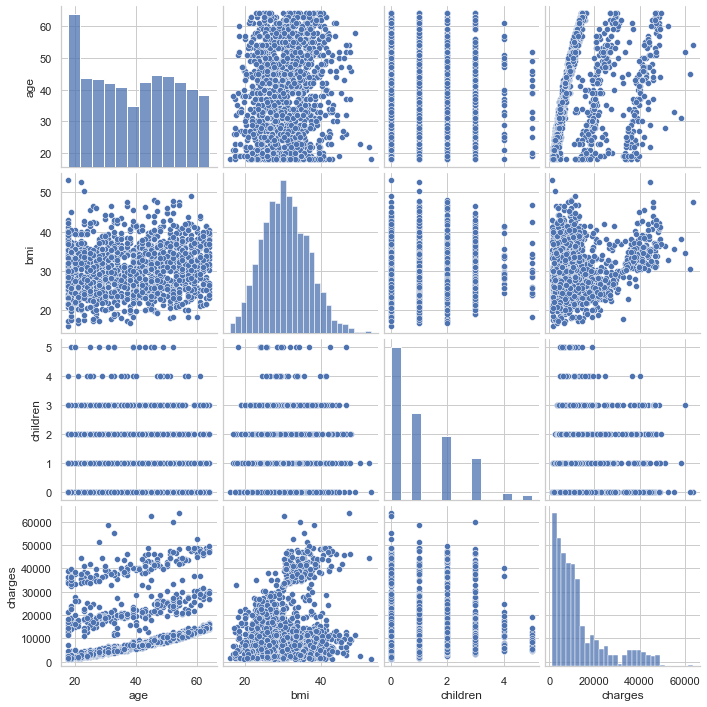

In [18]:
df.dropna(inplace = True)
sns.pairplot(df);

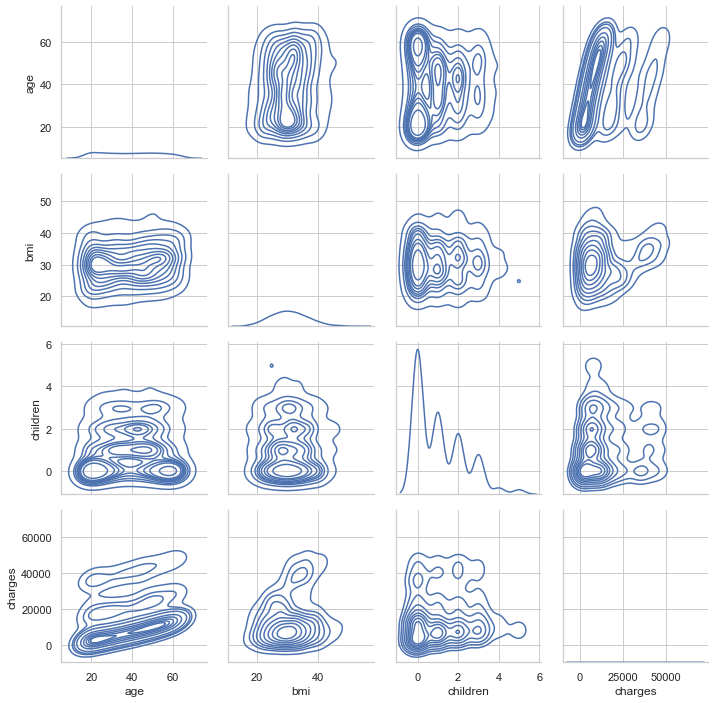

In [19]:
g = sns.PairGrid(df)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=10);

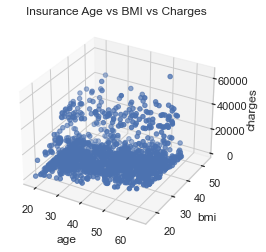

In [20]:
#3d plots

x = df['age']
y = df['bmi']
z = df['charges']

ax = plt.figure().add_subplot(projection='3d')
ax.scatter(x, y, z)

ax.set_title('Insurance Age vs BMI vs Charges')
ax.set_xlabel('age')
ax.set_ylabel('bmi')
ax.set_zlabel('charges')

plt.show()


In [21]:
# !pip install plotly==5.20.0 

In [25]:
import plotly.express as px


# Notice how easy: pass in the DataFrame and the names of the x, y, and z variables (all must be numeric)
fig = px.scatter_3d(df, x='age', y='charges', z='bmi' , color = 'smoker', symbol = 'sex', size = 'children')
fig.show()